<a href="https://colab.research.google.com/github/ancelik/mit-applied-data-science/blob/main/FDS_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# This imports libraries for data manipulation
import numpy as np
import pandas as pd

# This imports libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# This connects the notebook to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Understanding the structure of the data

In [ ]:
# This reads the data and creates a dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv')

# This returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Return the shape of the data frame which tells us number of rows and number of columns
df.shape

(1898, 9)

#### Observations:
1898 rows, 9 columns excluding the index.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Columns have different data types including int64, object, and float64. None of the columns have missing values.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# This returns the columns with null values
missing_cols = df.columns[df.isnull().any()].tolist()

#This prints the result
print(missing_cols)



[]


#### Observations:
df.info() already showed there were no missing values but this also confirms with returned empty list.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# This returns important statistics for each continous variable
summary = df.describe()

#This prints the result
print(summary)

           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000  


#### Observations:
Time (in minutes) it takes to prepare food:



*   min: 20.000000
*   avg: 27.371970
*   max: 35.000000  

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# This returns number of records for each unique "rating"
count_by_unique = df['rating'].value_counts()

#This prints the result
print(count_by_unique)

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64


#### Observations:
736 orders were not rated. See below:

Not given    736


In [ ]:
#Let's create a new variable that represents rating values as numerical values
df['numericRating'] = pd.to_numeric(df['rating'], errors='coerce')

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

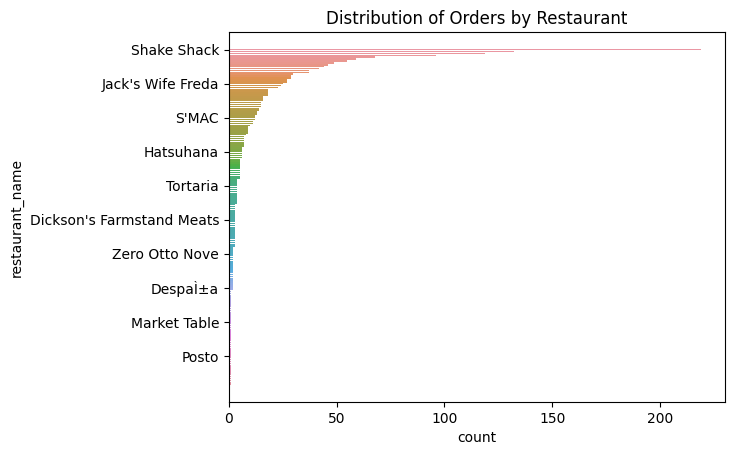

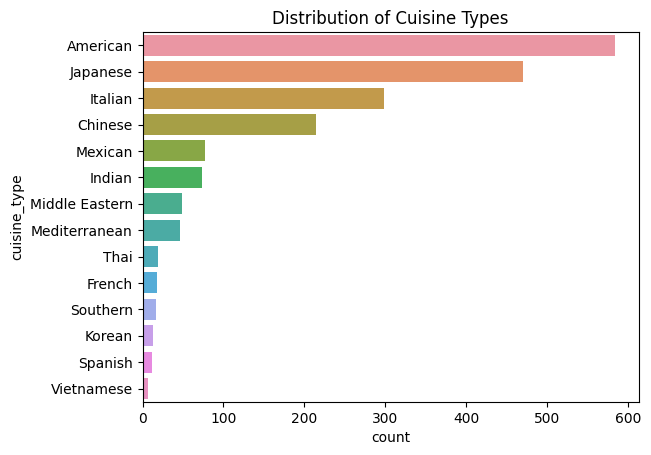

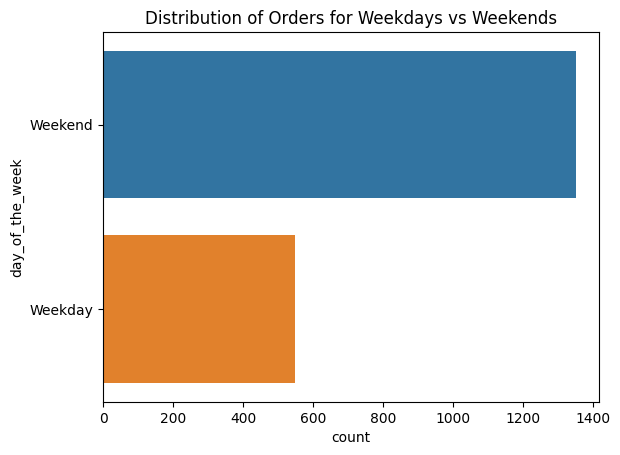

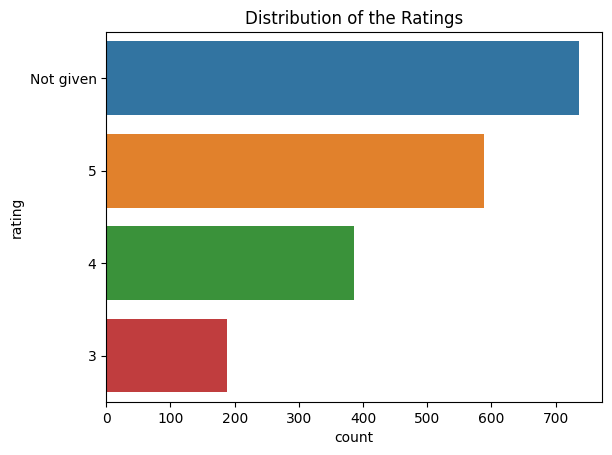

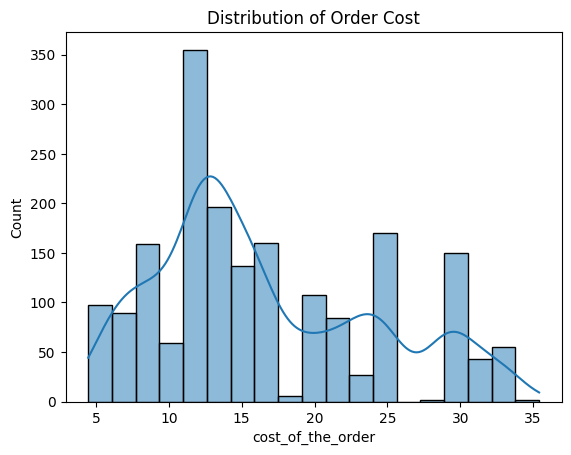

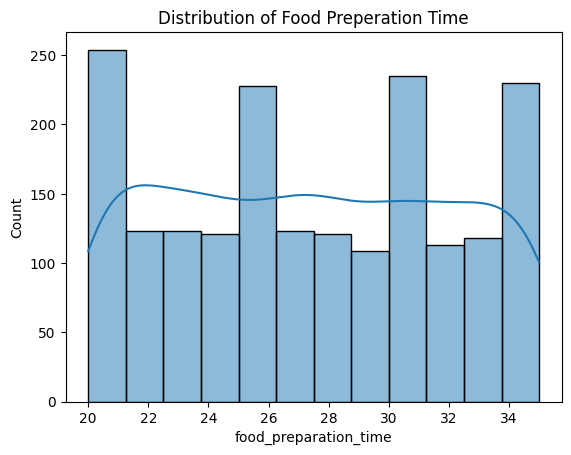

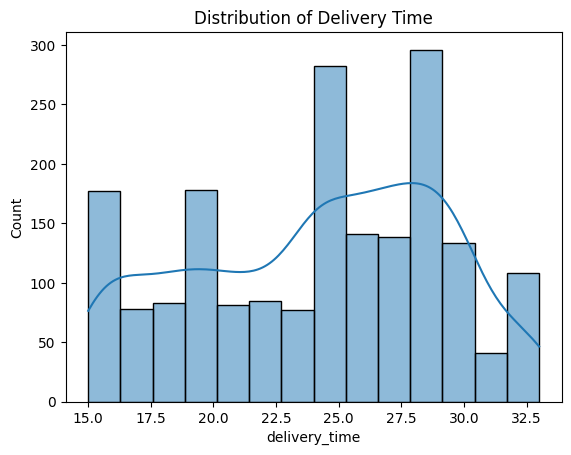

In [ ]:
# For easy reference columns and their data types are below:
# 0   order_id               1898 non-null   int64
# 1   customer_id            1898 non-null   int64
# 2   restaurant_name        1898 non-null   object
# 3   cuisine_type           1898 non-null   object
# 4   cost_of_the_order      1898 non-null   float64
# 5   day_of_the_week        1898 non-null   object
# 6   rating                 1898 non-null   object
# 7   food_preparation_time  1898 non-null   int64
# 8   delivery_time          1898 non-null   int64

#since order_id and customer_id represents unique id's, I will skip them on this part.
#However, we will use customer_id later in the notebook to understand # of orders and other relevant statistics.


# COUNT/BAR PLOTS FOR CATEGORICAL VARIABLES
# Bar plot for restaurant_name
sns.countplot(y=df['restaurant_name'], order=df['restaurant_name'].value_counts().index)
plt.title('Distribution of Orders by Restaurant')
plt.locator_params(axis='y', nbins=10)
plt.show()

# Bar plot for cuisine_type
sns.countplot(y=df['cuisine_type'], order=df['cuisine_type'].value_counts().index)
plt.title('Distribution of Cuisine Types')
plt.show()

# Bar plot for day_of_the_week
sns.countplot(y=df['day_of_the_week'], order=df['day_of_the_week'].value_counts().index)
plt.title('Distribution of Orders for Weekdays vs Weekends')
plt.show()

# Bar plot for rating
sns.countplot(y=df['rating'], order=df['rating'].value_counts().index)
plt.title('Distribution of the Ratings')
plt.show()

# HISTOGRAMS FOR CONTINUOUS VARIABLES
# Histogram for cost_of_the_order
sns.histplot(df['cost_of_the_order'], kde=True)
plt.title('Distribution of Order Cost')
plt.show()

# Histogram for food_preparation_time
sns.histplot(df['food_preparation_time'], kde=True)
plt.title('Distribution of Food Preperation Time')
plt.show()

# Histogram for delivery_time
sns.histplot(df['delivery_time'], kde=True)
plt.title('Distribution of Delivery Time')
plt.show()



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# This returns number of orders per unique restaurant and prints it for the top 5 restaurants
top_5_restaurants = df['restaurant_name'].value_counts().head(5)

#This prints the result
print(top_5_restaurants)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations:
Shake Shack has received the highest amount of orders almost doubling the orders of the 2nd and 3rd popular restaurants' orders individually.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# For easy reference columns and their data types are below:
# 0   order_id               1898 non-null   int64
# 1   customer_id            1898 non-null   int64
# 2   restaurant_name        1898 non-null   object
# 3   cuisine_type           1898 non-null   object
# 4   cost_of_the_order      1898 non-null   float64
# 5   day_of_the_week        1898 non-null   object
# 6   rating                 1898 non-null   object
# 7   food_preparation_time  1898 non-null   int64
# 8   delivery_time          1898 non-null   int64

# This filters the orders places on weekends
weekend_data = df[df['day_of_the_week'].isin(['Weekend'])]

#This counts the orders by unique cuisine type for the orders placed on weekends
popular_cuisines_weekends = weekend_data['cuisine_type'].value_counts()

#This prints the result
print(popular_cuisines_weekends)

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64


#### Observations:
American cuisine is the most popular cuisine on weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# For easy reference columns and their data types are below:
# 0   order_id               1898 non-null   int64
# 1   customer_id            1898 non-null   int64
# 2   restaurant_name        1898 non-null   object
# 3   cuisine_type           1898 non-null   object
# 4   cost_of_the_order      1898 non-null   float64
# 5   day_of_the_week        1898 non-null   object
# 6   rating                 1898 non-null   object
# 7   food_preparation_time  1898 non-null   int64
# 8   delivery_time          1898 non-null   int64

#This filters and calculates the length of orders that cost more than $20
num_orders_over_20 = len(df[df['cost_of_the_order']>20])

#This calculates the length of the entire data
total_orders = len(df)

#This calculates the pct of orders over $20
pct_over_20 = (num_orders_over_20 / total_orders) * 100

#This prints the result
print(f"{pct_over_20:.2f}% of orders cost more than 20 dollars.")

29.24% of orders cost more than 20 dollars.


#### Observations:
29.24% of orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# For easy reference columns and their data types are below:
# 0   order_id               1898 non-null   int64
# 1   customer_id            1898 non-null   int64
# 2   restaurant_name        1898 non-null   object
# 3   cuisine_type           1898 non-null   object
# 4   cost_of_the_order      1898 non-null   float64
# 5   day_of_the_week        1898 non-null   object
# 6   rating                 1898 non-null   object
# 7   food_preparation_time  1898 non-null   int64
# 8   delivery_time          1898 non-null   int64

#This calculates the mean of delivery times
mean_delivery_time = df['delivery_time'].mean()

#This prints the result
print(mean_delivery_time)

24.161749209694417


#### Observations:
24.161749209694417 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
#This filters the top 3 customers based on the number of orders
top_3_customers = df['customer_id'].value_counts().head(3)

#This prints the result
print(top_3_customers)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


#### Observations:

1.   customer 52832 ordered 13 times
2.   customer 47440 ordered 10 times
3.   customer 83287 ordered 9 times


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<ipython-input-15-a9a6251c37aa>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

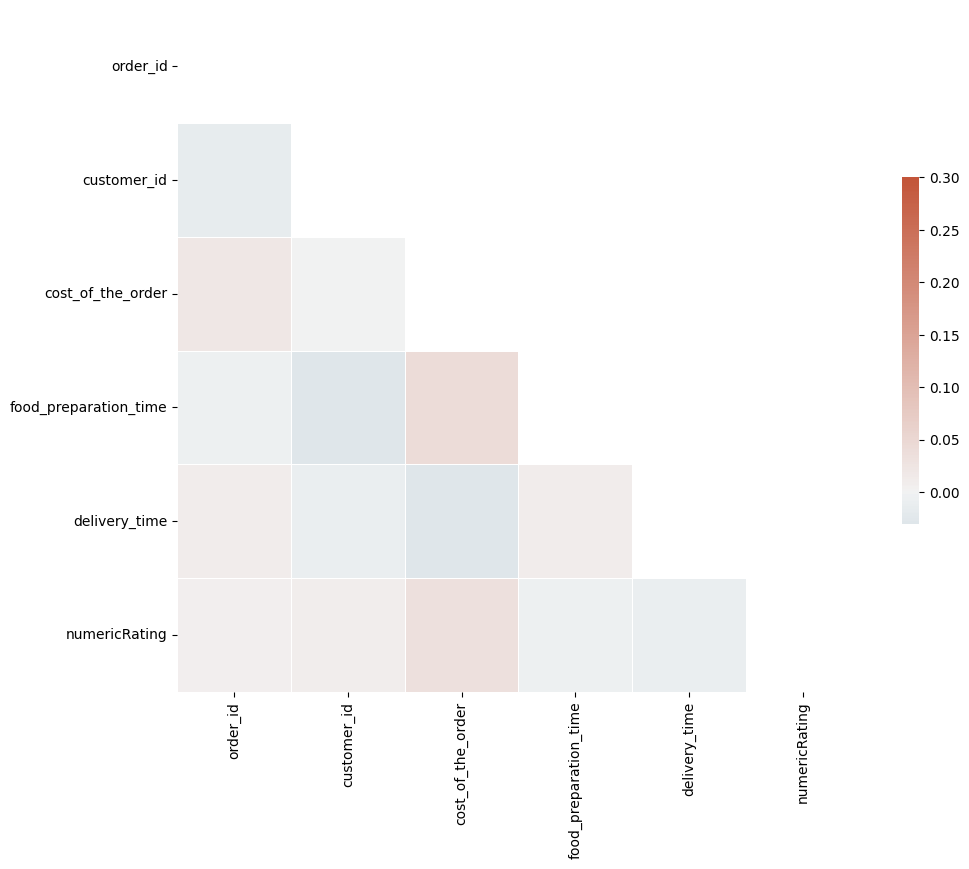

In [ ]:
# Correlation between numerical variables
# Calculate the correlation matrix for numerical variables
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: xlabel='food_preparation_time', ylabel='cost_of_the_order'>

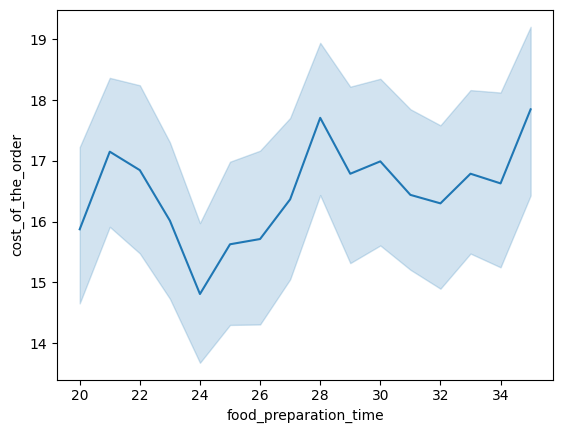

In [ ]:
# Since our correlation matrix showed that there is a correlation between food prep time and cost of the order, let's have a close look at it.
sns.lineplot(data=df,x="food_preparation_time", y="cost_of_the_order")

# It looks like as the food prep time increases, cost of the order increases as well.

<Axes: xlabel='food_preparation_time', ylabel='delivery_time'>

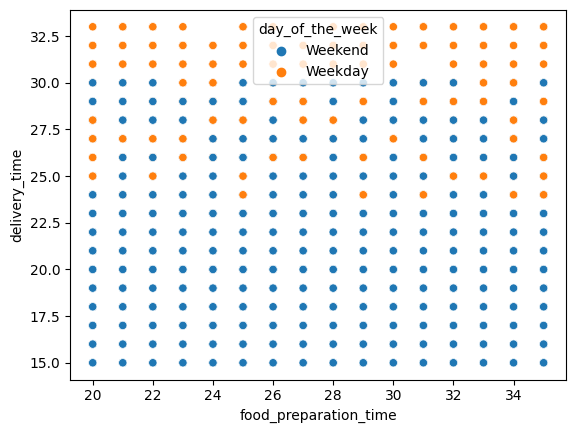

In [ ]:
#Relationship between food prep time, delivery time, and when the order is placed.
sns.scatterplot(data=df, x='food_preparation_time', y='delivery_time', hue='day_of_the_week')

#It looks like there is no relationship between when the order is placed vs food prep time, while there is clear relationship between how long the delivery takes and when the order is placed.


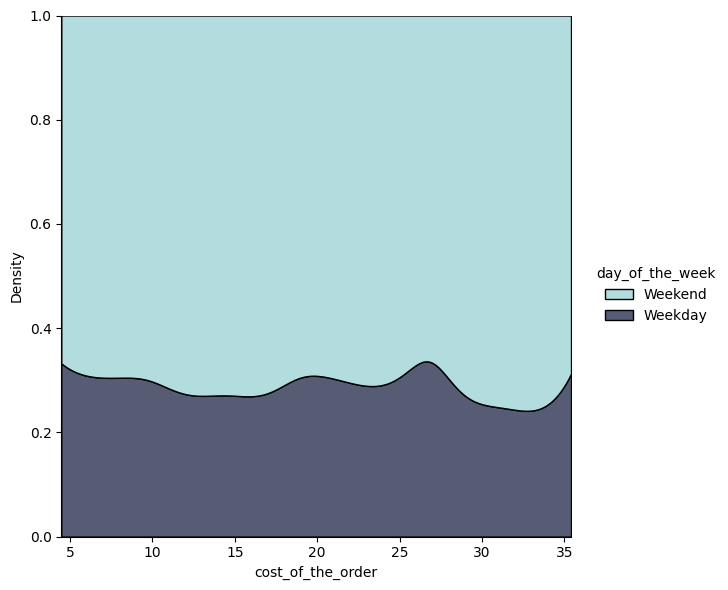

In [ ]:
# Relationship between cost of the order and when the order is placed.
sns.displot(
    data=df,
    x="cost_of_the_order", hue="day_of_the_week",
    kind="kde", height=6,
    multiple="fill", clip=(4.47, 35.41), #used min and max values of cost of the order
    palette="ch:rot=-.25,hue=1,light=.75",
)

#It looks like there is not much relationship between how much the order costs vs when it's placed.

In [ ]:
#Let's calculate the average rating for each cuisine type
cuisineRatings=df.groupby('cuisine_type').agg({'numericRating':['mean']})

#Rename the average rating column
cuisineRatings.columns = ['cuisineMeanRating']

#This prints the result
cuisineRatings.sort_values(by=['cuisineMeanRating'])

,cuisineMeanRating
cuisine_type,
Vietnamese,4.000000
Korean,4.111111
Mediterranean,4.218750
Middle Eastern,4.235294
American,4.298913
French,4.300000
Southern,4.307692
Chinese,4.338346
Italian,4.360465


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# For easy reference columns and their data types are below:
# 0   order_id               1898 non-null   int64
# 1   customer_id            1898 non-null   int64
# 2   restaurant_name        1898 non-null   object
# 3   cuisine_type           1898 non-null   object
# 4   cost_of_the_order      1898 non-null   float64
# 5   day_of_the_week        1898 non-null   object
# 6   rating                 1898 non-null   object
# 7   food_preparation_time  1898 non-null   int64
# 8   delivery_time          1898 non-null   int64

#Previously we created a new variable called 'numericRating' so that we can use the categorical rating values for numerical calculations.
#This creates new columns based on rating's count and mean grouped by restaurant name
grouped=df.groupby('restaurant_name').agg({'numericRating':['count','mean']})

#This renames the new columns for easier referencing
grouped.columns = ['rating_count','average_rating']

#This filters the data to identify eligible restaurants
eligible_restaurants = grouped[(grouped['rating_count']>50) & (grouped['average_rating']>4)]

#This creates a list so we can print the results
restaurant_list = eligible_restaurants.index.tolist()

#This prints the result
print(restaurant_list)

['Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack', 'The Meatball Shop']


#### Observations:
First I transformed rating column to a numeric column because it was an object. Then I calculated counts and means of each rating by each restaurant. Renamed the counts and means and filtered them by 50 and 5 respectively.

Eligible restaurants for this promotional offer are these: 'Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack', 'The Meatball Shop'

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# For easy reference columns and their data types are below:
# 0   order_id               1898 non-null   int64
# 1   customer_id            1898 non-null   int64
# 2   restaurant_name        1898 non-null   object
# 3   cuisine_type           1898 non-null   object
# 4   cost_of_the_order      1898 non-null   float64
# 5   day_of_the_week        1898 non-null   object
# 6   rating                 1898 non-null   object
# 7   food_preparation_time  1898 non-null   int64
# 8   delivery_time          1898 non-null   int64

# A function to calculate our fees based on the order size and our % based fee structure.
# Assumption is that we don't charge anything if the order is below $5.
def calculate_revenue(cost_of_the_order):
    if cost_of_the_order > 20:
        return cost_of_the_order * 0.25
    elif cost_of_the_order > 5:
        return cost_of_the_order * 0.15
    else:
        return 0

#This creates a new column for revenue and calculates the revenue using the function implemented above
df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)

#This calculates the total revenue
net_revenue = df['revenue'].sum()

#This prints the results
print(net_revenue)


6166.303


#### Observations:
Assuming that we are not charging anything if the order is below 5 dollars, our total revenue would be $6166.303.

In [ ]:
#This creates mean and sum revenue columns based on cuisine type
revenueByCuisine=df.groupby('cuisine_type').agg({'revenue':['mean','sum']})

#This renames the new columns for easier referencing
revenueByCuisine.columns = ['meanRevenueByCuisine','sumRevenueByCuisine']

#This shows the results
revenueByCuisine.sort_values(by=['meanRevenueByCuisine'])

,meanRevenueByCuisine,sumRevenueByCuisine
cuisine_type,,
Vietnamese,2.250429,15.7530
Korean,2.561769,33.3030
Mediterranean,2.963652,136.3280
Japanese,3.145201,1478.2445
Chinese,3.209491,690.0405
American,3.216223,1878.2740
Italian,3.244579,966.8845
Mexican,3.333675,256.6930
Indian,3.383479,246.9940


In [ ]:

#This creates mean rating column based on cuisine type
ratingByCuisine=df.groupby('cuisine_type').agg({'numericRating':['mean']})

#This renames the new columns for easier referencing
ratingByCuisine.columns = ['meanRatingByCuisine']

#This shows the results
ratingByCuisine.sort_values(by=['meanRatingByCuisine'])


,meanRatingByCuisine
cuisine_type,
Vietnamese,4.000000
Korean,4.111111
Mediterranean,4.218750
Middle Eastern,4.235294
American,4.298913
French,4.300000
Southern,4.307692
Chinese,4.338346
Italian,4.360465


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# For easy reference columns and their data types are below:
# 0   order_id               1898 non-null   int64
# 1   customer_id            1898 non-null   int64
# 2   restaurant_name        1898 non-null   object
# 3   cuisine_type           1898 non-null   object
# 4   cost_of_the_order      1898 non-null   float64
# 5   day_of_the_week        1898 non-null   object
# 6   rating                 1898 non-null   object
# 7   food_preparation_time  1898 non-null   int64
# 8   delivery_time          1898 non-null   int64

#This calculates the total time for each order to be prepared and delivered
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

#This filters the orders that took more than 60 minutes to prepare + deliver
orders_over_60_minutes = df[df['total_time'] > 60].shape[0]

#This calculates the pct of orders that took 60 minutes or more to prep and deliver
percentage = (orders_over_60_minutes / df.shape[0]) * 100

#This prints the results
print(f"{percentage:.2f}% of orders take more than 60 minutes from the time the order is placed to delivery.")


10.54% of orders take more than 60 minutes from the time the order is placed to delivery.


#### Observations:
10.54% of orders take more than 60 minutes from the time the order is prepared to delivery.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# For easy reference columns and their data types are below:
# 0   order_id               1898 non-null   int64
# 1   customer_id            1898 non-null   int64
# 2   restaurant_name        1898 non-null   object
# 3   cuisine_type           1898 non-null   object
# 4   cost_of_the_order      1898 non-null   float64
# 5   day_of_the_week        1898 non-null   object
# 6   rating                 1898 non-null   object
# 7   food_preparation_time  1898 non-null   int64
# 8   delivery_time          1898 non-null   int64

#This calculates the men delivery time based on order days (weekend or week days)
mean_delivery_times = df.groupby('day_of_the_week')['delivery_time'].mean()

#This prints the results
print(mean_delivery_times)



day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:
Weekend delivery times are about 6 minutes faster than Weekday delivery times excluding food_preparation_time.

1. Weekday    28.340037 minutes
2. Weekend    22.470022 minutes

In [ ]:
#This creates a new dataframe to merge/concat ratingByCuisine and RevenueByCuisine
cuisineTypeRatingRevenue = [ratingByCuisine, revenueByCuisine]
cuisineTypeRatingRevenue = pd.concat(cuisineTypeRatingRevenue, axis=1)
cuisineTypeRatingRevenue.sort_values(by='meanRevenueByCuisine')

,meanRatingByCuisine,meanRevenueByCuisine,sumRevenueByCuisine
cuisine_type,,,
Vietnamese,4.000000,2.250429,15.7530
Korean,4.111111,2.561769,33.3030
Mediterranean,4.218750,2.963652,136.3280
Japanese,4.373626,3.145201,1478.2445
Chinese,4.338346,3.209491,690.0405
American,4.298913,3.216223,1878.2740
Italian,4.360465,3.244579,966.8845
Mexican,4.416667,3.333675,256.6930
Indian,4.540000,3.383479,246.9940


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Spanish and Thai cuisines have relatively good ratings and high average revenue. However, they represent a very small amount of total revenue.

*  Vietnamese cuisine has the lowest mean rating and the lowest mean revenue as well as lowest total revenue.

### Recommendations:

*  Implementing a new promotion for Spanish and Thai cuisine would help us improve our total revenue while keeping the customers happy. However, there needs to be A/B testing to see if the ratings of these cuisines are relatively higher due to lack of orders thus higher quality.
*  Restaurants that serve Vietnamese cuisine should be further investigated to figure out whether we need to sign up alternative Vietnamese restaurants and/or consider promoting other cuisines to customers searching Vietnamese cuisine.

---